# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Food-Truck-LineReg.csv", header=None, names=["x", "y"])
df.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


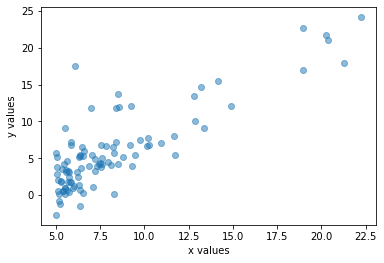

In [3]:
plt.scatter(df["x"], df["y"], s=None, c=None, alpha=0.5)
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

In [4]:
# corr_matrix = df.corr()
# plt.figure(figsize=(20,15))
# sns.heatmap(corr_matrix, annot=True)
# plt.show()

In [5]:
x = df["x"].tolist()
y = df["y"].tolist()

def split_data(X, Y, split):
    '''
    return X_train, X_test, y_train, y_test
    '''
    x_len = len(X)
    y_len = len(Y)
    if x_len != y_len:
        return -1,-1,-1,-1
    
    if split * 100 > 100:
        return -1, -1, -1, -1
    
    return X[0:int(split*x_len)], X[int(split*x_len)+1:len(x)], Y[0:int(split*y_len)], Y[int(split*y_len)+1:len(Y)]

X_train, X_test, y_train, y_test = split_data(x,y, 0.8)

print(X_train, "\n\n", X_test)

x_2 = [numx ** 2 for numx in x]
y_2 = [numy **2 for numy in y]


xy = []
for i in range(0, len(x)):
    xy.append(x[i] * y[i])
        
r = sum(xy) / (sum(x_2) * sum(y_2))
print("R=",r)


[6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781, 6.4862, 5.0546, 5.7107, 14.164000000000001, 5.734, 8.4084, 5.6407, 5.3794, 6.3654, 5.1301, 6.4296, 7.0708, 6.1891, 20.27, 5.4901, 6.3261, 5.5649, 18.945, 12.828, 10.957, 13.175999999999998, 22.203000000000003, 5.2524, 6.5894, 9.2482, 5.8918, 8.2111, 7.9334, 8.0959, 5.6063, 12.835999999999999, 6.3534, 5.4069, 6.8825, 11.708, 5.7737, 7.8247, 7.0931, 5.0702, 5.8014, 11.7, 5.5416, 7.5402, 5.3077, 7.4239, 7.6031, 6.3328, 6.3589, 6.2742, 5.6397, 9.3102, 9.4536, 8.8254, 5.1793, 21.279, 14.908, 18.959, 7.2182, 8.2951, 10.236, 5.4994, 20.340999999999998, 10.136000000000001, 7.3345, 6.0062, 7.2259, 5.0269, 6.5479, 7.5386] 

 [10.274000000000001, 5.1077, 5.7292, 5.1884, 6.3557, 9.7687, 6.5159, 8.5172, 9.1802, 6.002000000000001, 5.5204, 5.0594, 5.7077, 7.6366, 5.8707, 5.3054, 8.2934, 13.394, 5.4369]
R= 0.00012897984786377177


In [6]:
def standard_dev(array):
    length = len(array)
    mean = sum(array)/length
    sq_diff = []
    for i in range(0, length):
        sq_diff.append((array[i] - mean) **2)
    sd = (sum(sq_diff)/length) ** 0.5
    return sd

In [7]:
sd_x = standard_dev(x)
sd_y = standard_dev(y)

print(sd_x)
print(sd_y)

3.8498839959227156
5.48178525707763


In [8]:
# slope
m = r * (sd_y / sd_x)
print(m)

0.00018365224230874023


In [9]:
# y intercept
c = (sum(y)/len(y)) - (m*(sum(x)/len(y)))
print(c)

5.8376364859795995


In [10]:
# y predicted
y_pred = []
for num in x:
    y_pred.append(m*num + c)
    
print(y_pred)

[5.83875861954533, 5.838651660479409, 5.839200945970931, 5.838922639362936, 5.838712651389081, 5.83917602436165, 5.839009543603996, 5.839211873279348, 5.8388276911536625, 5.838564774603573, 5.838685268839752, 5.8402377363396605, 5.838689547936998, 5.839180707493829, 5.83867241318279, 5.838624424851875, 5.8388055059627915, 5.838578640347867, 5.838817296436748, 5.838935054254516, 5.838773128072472, 5.841359116931198, 5.838644755155099, 5.838798288429669, 5.838658492342823, 5.841115777710138, 5.839992376943936, 5.839648763598577, 5.840056287924259, 5.841714116715581, 5.838601101017102, 5.838846644065069, 5.839334938646919, 5.838718528260834, 5.839144472906421, 5.839093472678732, 5.839123316168107, 5.838666095545655, 5.839993846161875, 5.838803302135884, 5.838629475288538, 5.838900472537289, 5.83978668643255, 5.838696838931018, 5.839073509679992, 5.838939149699519, 5.838567639578553, 5.838701926098129, 5.839785217214612, 5.838654213245578, 5.839021260617056, 5.838611256986102, 5.8389999018

In [11]:
learning_rate = 0.001

def grad_decent(m,c):
    pred = []
    
    for i in range(len(x)):
        pred.append(m*x[i] + c)
    
    m_pred = (-2/len(x)) * (sum([x[i]*(y[i]-pred[i]) for i in range(len(x))]))
    c_pred = (-2/len(y)) * (sum([(y[i]-pred[i]) for i in range(len(y))]))
    
    m -= learning_rate * m_pred
    c -= learning_rate * c_pred
    
    return m , c, pred

In [17]:
for i in range(0,10000):
    m,c,y_pred = grad_decent(m,c)
print(m,c)
print(y_pred)

1.1923105064059438 -3.888582673174717
[3.3965547545347667, 2.702153267493314, 6.2682339810789625, 4.46140703488628, 3.098119500059362, 6.106437480750108, 5.025608243107461, 6.339176440692572, 3.844982637907519, 2.138071290296693, 2.9203460424393746, 12.999302241628111, 2.948126871162015, 6.1368413920130855, 2.8368843252468916, 2.5253336580698122, 3.7009515602382064, 2.2280907138400132, 3.777497878006168, 4.542007207489307, 3.490747263937711, 20.279548601303784, 2.6573224022584943, 3.6540937675858554, 2.746507208629889, 18.699737525874657, 11.4063757534973, 9.175563283966808, 11.821299718968497, 22.58428430606191, 2.373910256877736, 3.9680290552541506, 7.138143536273752, 3.1362734279187827, 5.901598580554845, 5.570494025349811, 5.764244440260931, 2.7958688527980153, 11.415914235462154, 3.6866438372909234, 2.5581221898240014, 4.31749518824153, 10.070988278417584, 2.9954615879126085, 5.440889901652342, 4.56859572596634, 2.15667133012816, 3.0284885817159197, 10.061449796452727, 2.718726379

In [13]:
# error stuff
raw_error = []
for i in range(0,len(y)):
    raw_error.append(y[i] - y_pred[i])
    
sse = sum([num ** 2 for num in raw_error])
mse = sse/len(x)
rmse = mse ** 0.5

print(sse)
print(mse)
print(rmse)

869.7734907319058
8.9667370178547
2.994451037812223


In [14]:
# coefficient of determination
rss_values = []
for i in range(0, len(y)):
    rss_values.append((y[i] - y_pred[i])**2)
rss = sum(rss_values)
print(rss)

mean = sum(y)/len(y)
tss = sum([(num - mean) ** 2 for num in y])
print(tss)

r_2 = 1-(rss/tss)

print(r_2)

869.7734907319058
2914.8470516572247
0.7016057874332036


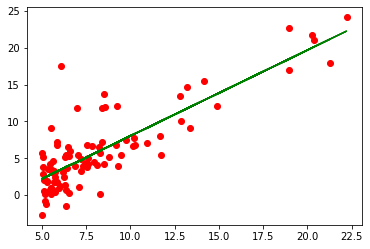

In [15]:
plt.scatter(x, y, color="red")
plt.plot(x, y_pred, color="green")
plt.show()

In [16]:
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.7016057874332036
